# Exploracion De Datos De Accidentes

## Importes

In [67]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

project_root = Path().resolve().parent
sys.path.append(str(project_root))

from lib.load_and_clean import load_and_clean

## Cargamos Los Datos

In [57]:
df = load_and_clean("../data/accidents.csv")

In [58]:
df.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'description', 'street', 'city', 'county',
       'state', 'zipcode', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_direction', 'wind_speed(mph)',
       'precipitation(in)', 'weather_condition', 'amenity', 'bump', 'crossing',
       'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
       'stop', 'traffic_calming', 'traffic_signal', 'turning_loop',
       'sunrise_sunset', 'distancia_afectada_km'],
      dtype='object')

## Representacion De Los Datos

### Histograma Mostrando Distribucion de Severidad De Accidentes

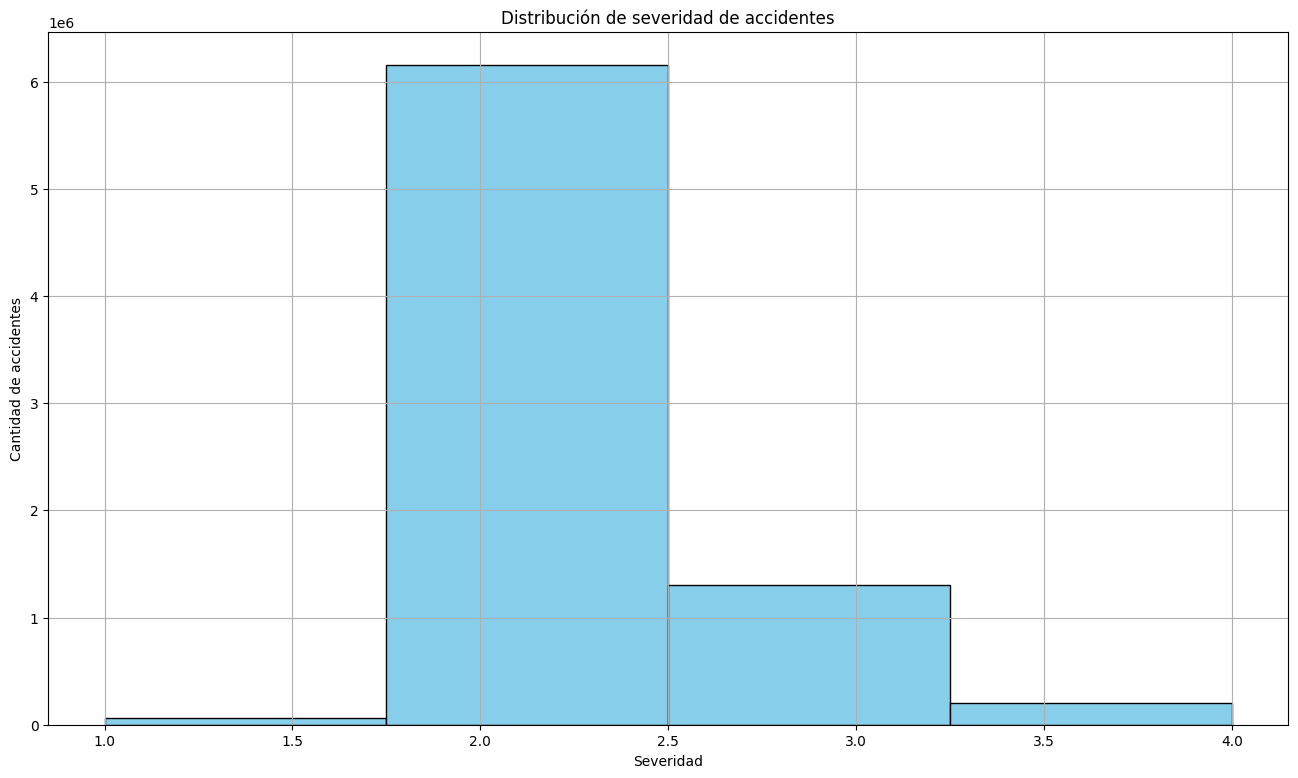

In [109]:
plt.figure(figsize=(16,9))
df['severity'].hist(bins=4, color='skyblue', edgecolor='black')
plt.title('Distribución de severidad de accidentes')
plt.xlabel('Severidad')
plt.ylabel('Cantidad de accidentes')
plt.show()

### Grafica De Barras Mostrando Top 10 Cuidades Con Mas Accidentes

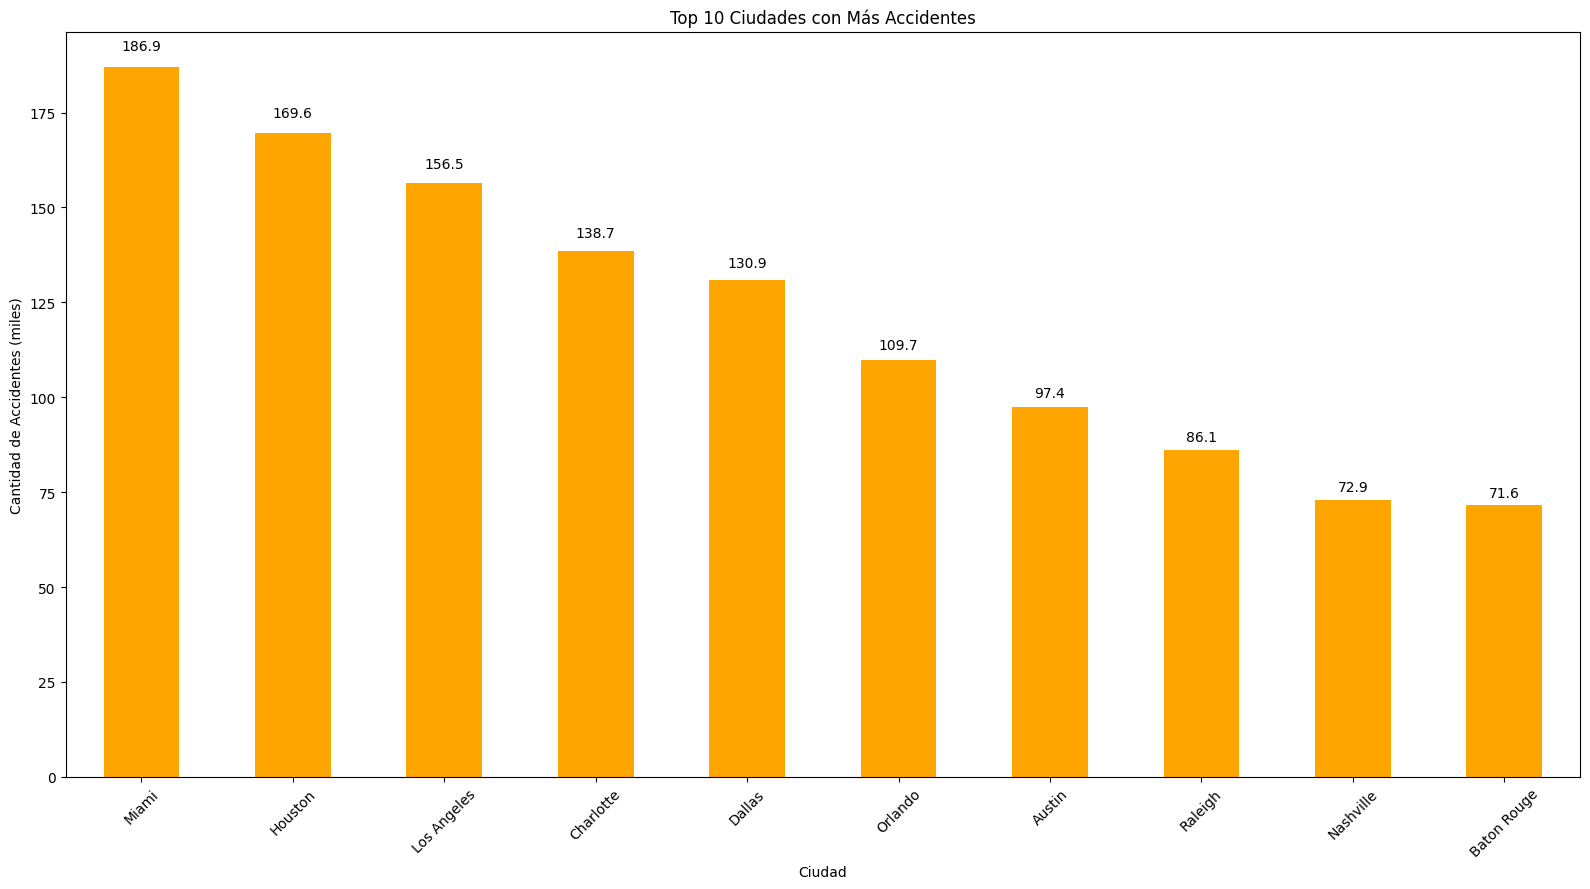

In [108]:
accidentes_por_ciudad = df['city'].value_counts().head(10)
accidentes_por_ciudad_k = accidentes_por_ciudad / 1000  # convertir a miles

plt.figure(figsize=(16,9))
accidentes_por_ciudad_k.plot(kind='bar', color='orange')

plt.title('Top 10 Ciudades con Más Accidentes')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Accidentes (miles)')
plt.xticks(rotation=45)

# Añadir etiquetas con un pequeño espacio sobre la barra
for i, v in enumerate(accidentes_por_ciudad_k):
    offset = v * 0.02  # 2% del valor de la barra
    plt.text(i, v + offset, f"{v:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Heatmap De Zonas Con Accidentes

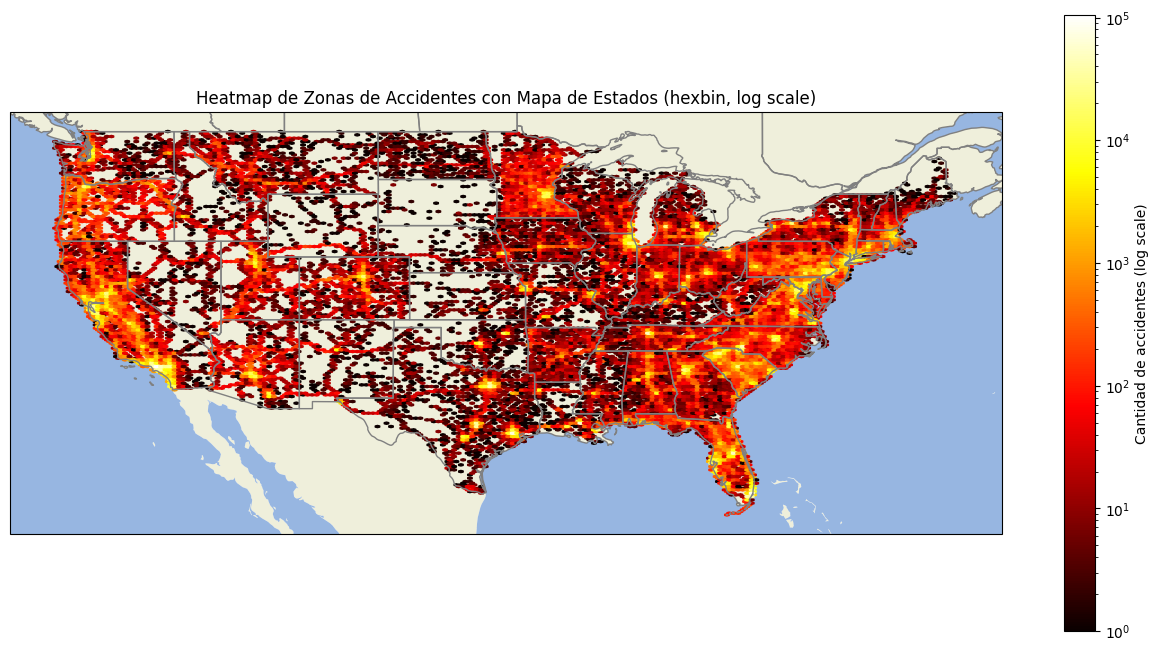

In [70]:
# Convert your lat/lng to the PlateCarree projection (standard for lon/lat)
plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add US states
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Hexbin plot
hb = ax.hexbin(
    df['start_lng'], df['start_lat'],
    gridsize=200,
    cmap='hot',
    bins='log',
    mincnt=1,
    transform=ccrs.PlateCarree()  # Make sure data is interpreted correctly
)

# Colorbar
cb = plt.colorbar(hb, ax=ax, orientation='vertical', label='Cantidad de accidentes (log scale)')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Heatmap de Zonas de Accidentes con Mapa de Estados (hexbin, log scale)")

plt.show()


## Mas Visualizaciones

#### Sample Para No Cargar Demasiado

In [62]:
df_sample = df.sample(frac=0.05, random_state=42)
df_sample.sample(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,description,street,...,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,distancia_afectada_km
2799956,A-2809834,2,2018-05-08 11:07:58,2018-05-08 12:07:24,34.125668,-81.223160,NaN,NaN,Accident on US-76 Dutch Fork Rd near Shady Gro...,Dutch Fork Rd,...,False,False,False,False,False,False,False,False,Day,0.0
3132929,A-3142808,3,2017-12-20 08:44:30,2017-12-20 09:14:10,39.511559,-119.653473,NaN,NaN,Accident on I-80 Westbound at Exit 22 Canyon Rd.,Canyon Rd,...,False,False,False,False,False,False,False,False,Day,0.0
2150108,A-2159973,2,2019-04-10 07:25:17,2019-04-10 08:24:59,32.790230,-96.795288,NaN,NaN,Accident on Hawkins St at Ross Ave.,N Hawkins St,...,False,False,False,False,False,False,False,False,Day,0.0


### Violin Mostrando Severidad de accidentes por Precipitacion

C:\Users\joseb_m\AppData\Local\Temp\ipykernel_11608\3874223131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\joseb_m\AppData\Local\Temp\ipykernel_11608\3874223131.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


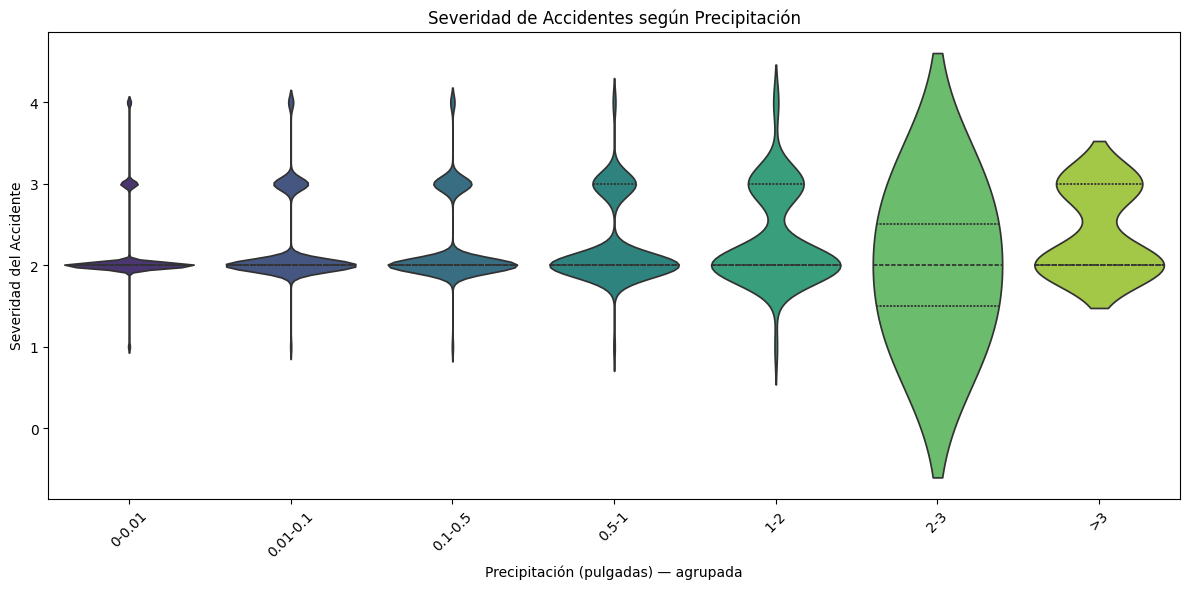

In [95]:
bins = [0, 0.01, 0.1, 0.5, 1, 2, 3, df_sample['precipitation(in)'].max()]
labels = ['0-0.01', '0.01-0.1', '0.1-0.5', '0.5-1', '1-2', '2-3', '>3']

df_sample['precip_bin'] = pd.cut(df_sample['precipitation(in)'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_sample,
    x='precip_bin',
    y='severity',
    inner='quartile',
    palette='viridis',
    scale='count'  
)
plt.xlabel('Precipitación (pulgadas) — agrupada')
plt.ylabel('Severidad del Accidente')
plt.title('Severidad de Accidentes según Precipitación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Diagrama de Barras + Lineas Mostrando Horas Vs Cantidad De Accidentes

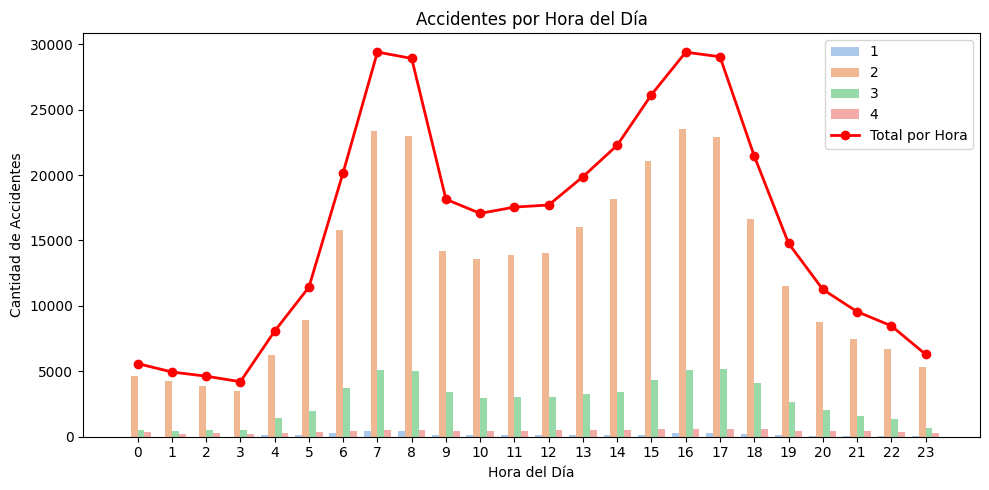

In [91]:
# Extraer la hora
df_sample['hour'] = df_sample['start_time'].dt.hour

# Contar accidentes por hora
conteo_por_hora = df_sample.groupby('hour').size()

plt.figure(figsize=(10,5))

# Gráfico de barras por hora y severidad
sns.countplot(data=df_sample, x='hour', hue='severity', palette='pastel')

# Línea superpuesta mostrando total de accidentes por hora
plt.plot(conteo_por_hora.index, conteo_por_hora.values, color='red', marker='o', linewidth=2, label='Total por Hora')

plt.title('Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.legend()
plt.tight_layout()
plt.show()


### Histogramas Mostrando Zonas De Interest Vs Accidentes

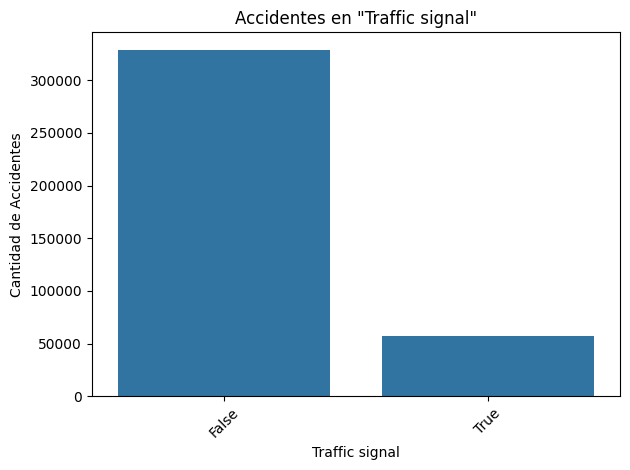

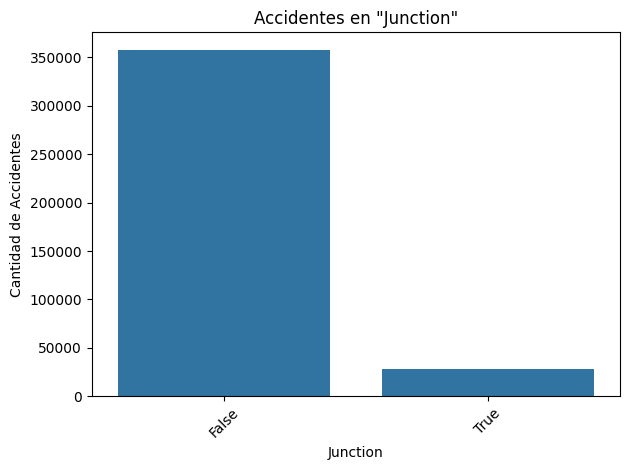

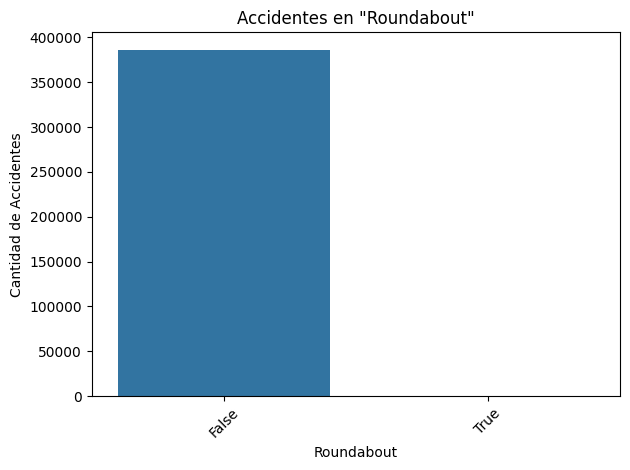

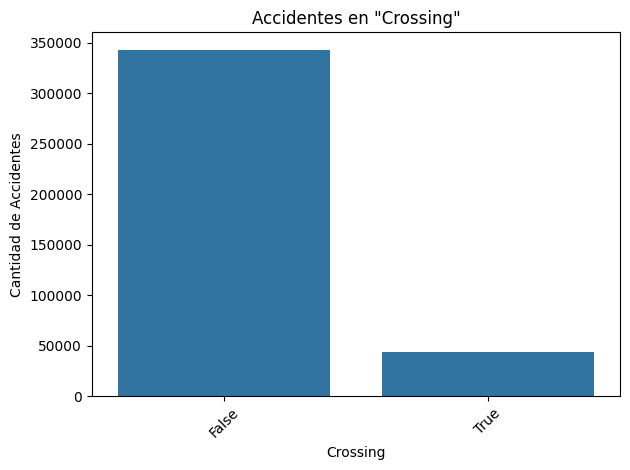

In [89]:
features = ['traffic_signal', 'junction', 'roundabout', 'crossing']

for f in features:
    sns.countplot(data=df_sample, x=f)
    plt.title(f'Accidentes en "{f.replace("_", " ").capitalize()}"')
    plt.xlabel(f.replace("_", " ").capitalize())
    plt.ylabel('Cantidad de Accidentes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Histograma Viendo Comparacion Entre Accidentes De Dia vs Noche

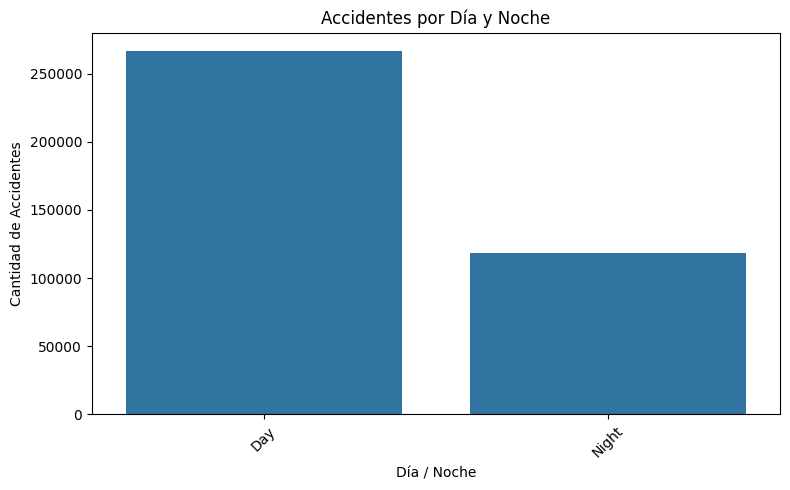

In [87]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_sample,
    x='sunrise_sunset',
)
plt.xlabel('Día / Noche')
plt.ylabel('Cantidad de Accidentes')
plt.title('Accidentes por Día y Noche')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Severidad De Accidentes de Dia Vs. De Noche

C:\Users\joseb_m\AppData\Local\Temp\ipykernel_11608\2221829605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dia_noche = df_sample.groupby(['sunrise_sunset', 'severity']).size().reset_index(name='cantidad')
C:\Users\joseb_m\AppData\Local\Temp\ipykernel_11608\2221829605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dia_noche['porcentaje'] = dia_noche.groupby('sunrise_sunset')['cantidad'].transform(lambda x: x / x.sum() * 100)


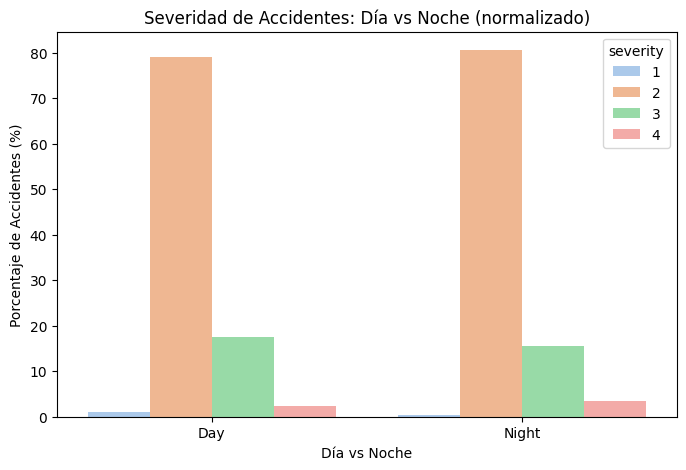

In [86]:
dia_noche = df_sample.groupby(['sunrise_sunset', 'severity']).size().reset_index(name='cantidad')
dia_noche['porcentaje'] = dia_noche.groupby('sunrise_sunset')['cantidad'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(8,5))
sns.barplot(
    data=dia_noche,
    x='sunrise_sunset',
    y='porcentaje',
    hue='severity',
    palette='pastel'
)
plt.ylabel('Porcentaje de Accidentes (%)')
plt.xlabel('Día vs Noche')
plt.title('Severidad de Accidentes: Día vs Noche (normalizado)')
plt.show()